In [167]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [168]:
train = pd.read_csv('titanic_train.csv')

In [169]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

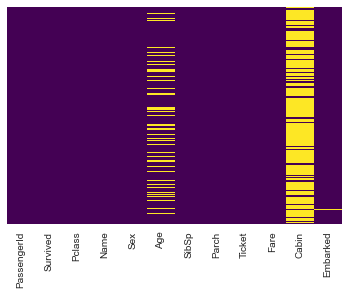

In [171]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
### There are a lot of missing Cabin data and a little Age data 

In [172]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

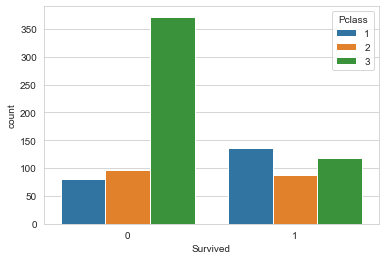

In [173]:
sns.countplot(x='Survived',data=train,hue='Pclass')
### 0 means not survived 
### 1 means survived people
### Me

/Users/perimtemizoz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age'>

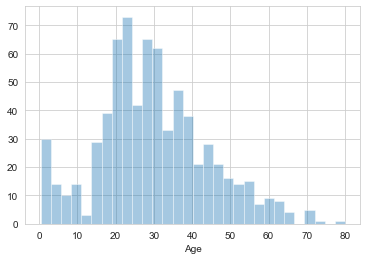

In [174]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

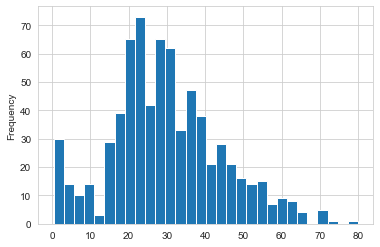

In [175]:
train['Age'].plot.hist(bins=30)

In [176]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

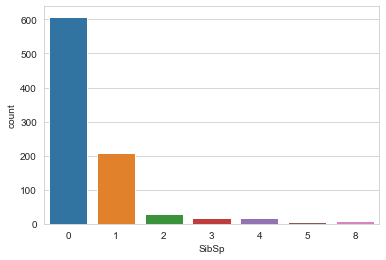

In [177]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

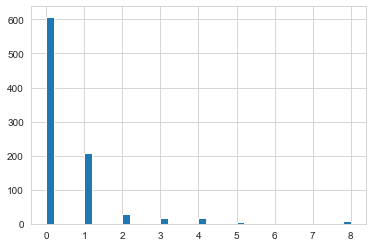

In [178]:
train['SibSp'].hist(bins=40)

In [179]:
import cufflinks as cf

In [180]:
cf.go_offline()

In [21]:
#train['Fare'].iplot(kind='hist',bins=50)

In [22]:
### Lets go to the Logistic Regression

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

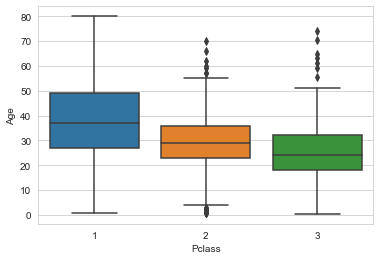

In [181]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [182]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1: 
            return 37 
        elif Pclass == 2: 
            return 29
        else:
            return 24 
    else:
        return Age

In [183]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

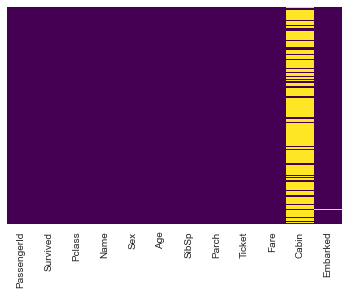

In [184]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [186]:
train.dropna(inplace=True)
### No missing values

In [187]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
### pythin do not know the male and female so we give the meaning zero not female one female
### we drop the first column
### Embarked and Sex are categorical value so we should change meaningfully according to python

In [188]:
sex

,male
1,0
3,0
6,1
10,0
11,0
...,...
871,0
872,1
879,0
887,0


In [189]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [190]:
embark

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1
...,...,...
871,0,1
872,0,1
879,0,0
887,0,1


In [192]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [193]:
train = pd.concat([train,sex,embark],axis=1)

In [194]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1


In [65]:
### we wrote male(to the sex group) and we separated the Q and S as an 1 and 0

In [195]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [196]:
train.drop(['Cabin'],axis=1,inplace=True)

In [197]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1
6,7,0,1,54.0,0,0,51.8625,1,0,1
10,11,1,3,4.0,1,1,16.7000,0,0,1
11,12,1,1,58.0,0,0,26.5500,0,0,1


In [198]:
train.drop('PassengerId',axis=1,inplace=True)

In [199]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,1,38.0,1,0,71.2833,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
10,1,3,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1
...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,0,0,1
872,0,1,33.0,0,0,5.0000,1,0,1
879,1,1,56.0,0,1,83.1583,0,0,0
887,1,1,19.0,0,0,30.0000,0,0,1


In [200]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [202]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [203]:
logmodel = LogisticRegression()

In [204]:
logmodel.fit(X_train,y_train)

/Users/perimtemizoz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [206]:
predictions = logmodel.predict(X_test)

In [207]:
from sklearn.metrics import classification_report

In [208]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.86      0.90      0.88        41

    accuracy                           0.84        61
   macro avg       0.82      0.80      0.81        61
weighted avg       0.83      0.84      0.83        61



In [209]:
from sklearn.metrics import confusion_matrix 

In [210]:
confusion_matrix(y_test,predictions)

array([[14,  6],
       [ 4, 37]])